PHYSBOの基本(https://issp-center-dev.github.io/PHYSBO/manual/master/ja/notebook/tutorial_basic.html)


In [1]:
import physbo

In [2]:
#In
import numpy as np
import scipy
import physbo
import itertools

#In
#Create candidate
window_num=10001
x_max = 2.0
x_min = -2.0

X = np.linspace(x_min,x_max,window_num).reshape(window_num, 1)

In [3]:
fx_list=[]
x_list = []
# Declare the class for calling the simulator.
class simulator:

    def __call__(self, action):
        action_idx = action[0]
        x = X[action_idx][0]
        fx = 3.0*x**4 + 4.0*x**3 + 1.0
        # fx_list.append(fx)
        # x_list.append(X[action_idx][0])

        # print ("*********************")
        # print ("Present optimum interactions")

        # print ("x_opt=", x_list[np.argmin(np.array(fx_list))])

        return -fx

In [4]:
# policy のセット
policy = physbo.search.discrete.policy(test_X=X)

# シード値のセット
policy.set_seed(0)

In [5]:
fx_list=[]
x_list = []
res = policy.random_search(max_num_probes=20, simulator=simulator())

0001-th step: f(x) = -51.387604 (action=9395)
   current best f(x) = -51.387604 (best action=9395) 

0002-th step: f(x) = -0.581263 (action=3583)
   current best f(x) = -0.581263 (best action=3583) 

0003-th step: f(x) = -0.827643 (action=4015)
   current best f(x) = -0.581263 (best action=3583) 

0004-th step: f(x) = -14.220707 (action=154)
   current best f(x) = -0.581263 (best action=3583) 

0005-th step: f(x) = -34.192764 (action=8908)
   current best f(x) = -0.581263 (best action=3583) 

0006-th step: f(x) = -31.595527 (action=8819)
   current best f(x) = -0.581263 (best action=3583) 

0007-th step: f(x) = -0.361729 (action=3269)
   current best f(x) = -0.361729 (best action=3269) 

0008-th step: f(x) = -0.755839 (action=3870)
   current best f(x) = -0.361729 (best action=3269) 

0009-th step: f(x) = -10.883996 (action=370)
   current best f(x) = -0.361729 (best action=3269) 

0010-th step: f(x) = -0.150313 (action=2949)
   current best f(x) = -0.150313 (best action=2949) 

0011-t

In [6]:
res = policy.bayes_search(max_num_probes=200, simulator=simulator(), score='TS',
                                                  interval=0, num_rand_basis=500)

Start the initial hyper parameter searching ...
Done

Start the hyper parameter learning ...
0 -th epoch marginal likelihood 55.074208787406135
50 -th epoch marginal likelihood 54.02707203875111
100 -th epoch marginal likelihood 53.18769741991673
150 -th epoch marginal likelihood 52.410262453733665
200 -th epoch marginal likelihood 51.64554036744884
250 -th epoch marginal likelihood 50.885372319638016
300 -th epoch marginal likelihood 50.129720337595614
350 -th epoch marginal likelihood 49.378835168371786
400 -th epoch marginal likelihood 48.632896402510625
450 -th epoch marginal likelihood 47.892273855957605
500 -th epoch marginal likelihood 47.15741745486759
Done

0021-th step: f(x) = -0.129612 (action=2163)
   current best f(x) = -0.129612 (best action=2163) 

0022-th step: f(x) = -0.002719 (action=2554)
   current best f(x) = -0.002719 (best action=2554) 

0023-th step: f(x) = -1.000342 (action=5109)
   current best f(x) = -0.002719 (best action=2554) 

0024-th step: f(x) = -0.0706

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

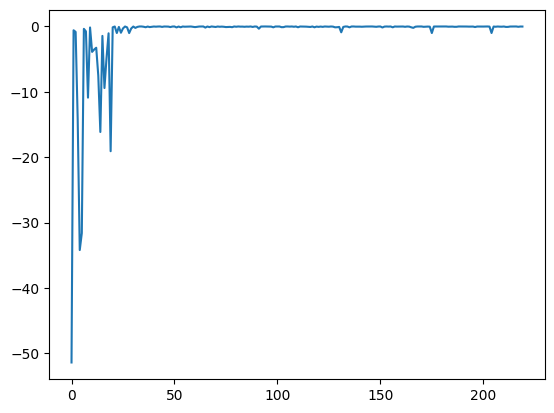

In [8]:
plt.plot(res.fx[0:res.total_num_search])

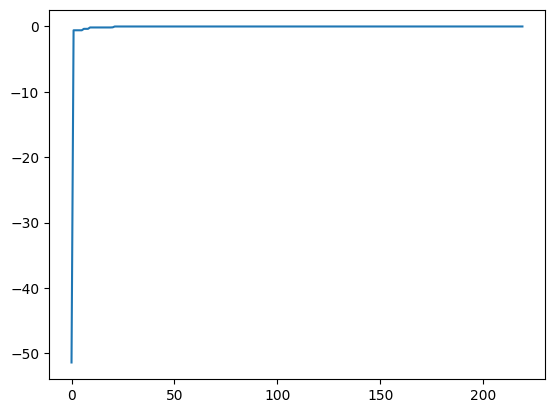

In [9]:
best_fx, best_action = res.export_all_sequence_best_fx()
plt.plot(best_fx)

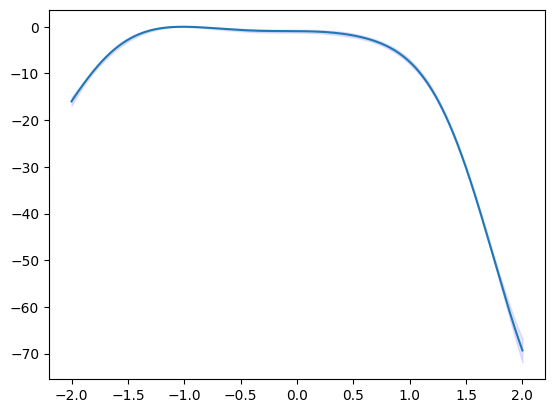

In [10]:
mean = policy.get_post_fmean(X)
var = policy.get_post_fcov(X)
std = np.sqrt(var)

x = X[:,0]
fig, ax = plt.subplots()
ax.plot(x, mean)
ax.fill_between(x, (mean-std), (mean+std), color='b', alpha=.1)

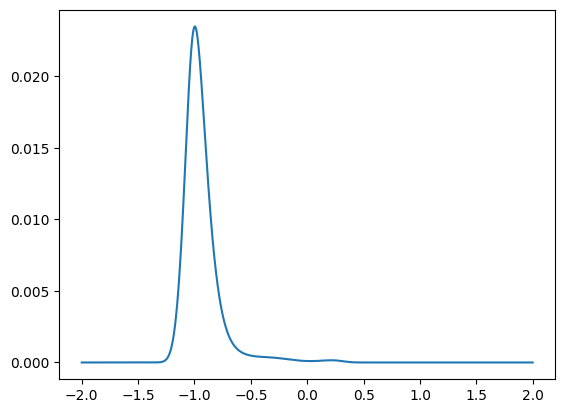

In [11]:
score = policy.get_score(mode="EI", xs=X)
plt.plot(X, score)